# DATABASE INTEGRATION

In [249]:
import retrieve_data_allsp
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [197]:
anks_all_sp = pd.read_csv("/cluster/gjb_lab/2394007/def_data_retrieval/all_anks_allsp.csv")

In [198]:
anks_all_sp.source.value_counts()

Uniprot    7230
SM00248    6396
PS50088    4119
PR01415     792
PF00023     233
PF13606      55
Name: source, dtype: int64

In [199]:
conf_db = ['PS50088', 'SM00248', 'Uniprot', 'PR01415', 'PF00023', 'PF13606'] # ORDER OF CONFIDENCE OF THE DATABASES

In [200]:
db_order = {}
for i, db in enumerate(conf_db):
    db_order[db] = i

In [201]:
anks_all_sp["conf_index"] = anks_all_sp.source.map(db_order)

In [202]:
anks_all_sp = anks_all_sp.sort_values(["conf_index", "accession", "start", "end"])

In [203]:
anks_all_sp = anks_all_sp.drop_duplicates(["repeat_id"])

In [204]:
anks_human = anks_all_sp[anks_all_sp.species == "HUMAN"]

In [205]:
anks_all_sp.source.value_counts()

SM00248    6373
PS50088    4119
Uniprot    2049
PR01415     792
PF00023     218
PF13606      45
Name: source, dtype: int64

In [206]:
sm = anks_all_sp[anks_all_sp.source == 'SM00248']    #6373
ps = anks_all_sp[anks_all_sp.source == 'PS50088']    #4119
up = anks_all_sp[anks_all_sp.source == 'Uniprot']    #2049
pr = anks_all_sp[anks_all_sp.source == 'PR01415']    #792
pf1 = anks_all_sp[anks_all_sp.source == 'PF00023']   #218
pf2 = anks_all_sp[anks_all_sp.source == 'PF13606']   #45 

In [136]:
sm_human = anks_human[anks_human.source == 'SM00248']    #1406
ps_human = anks_human[anks_human.source == 'PS50088']    #1016
up_human = anks_human[anks_human.source == 'Uniprot']    #319
pr_human = anks_human[anks_human.source == 'PR01415']    #224
pf1_human = anks_human[anks_human.source == 'PF00023']   #52
pf2_human = anks_human[anks_human.source == 'PF13606']   #10

## MERGING SMART WITH REFERENCE (PROSITE)

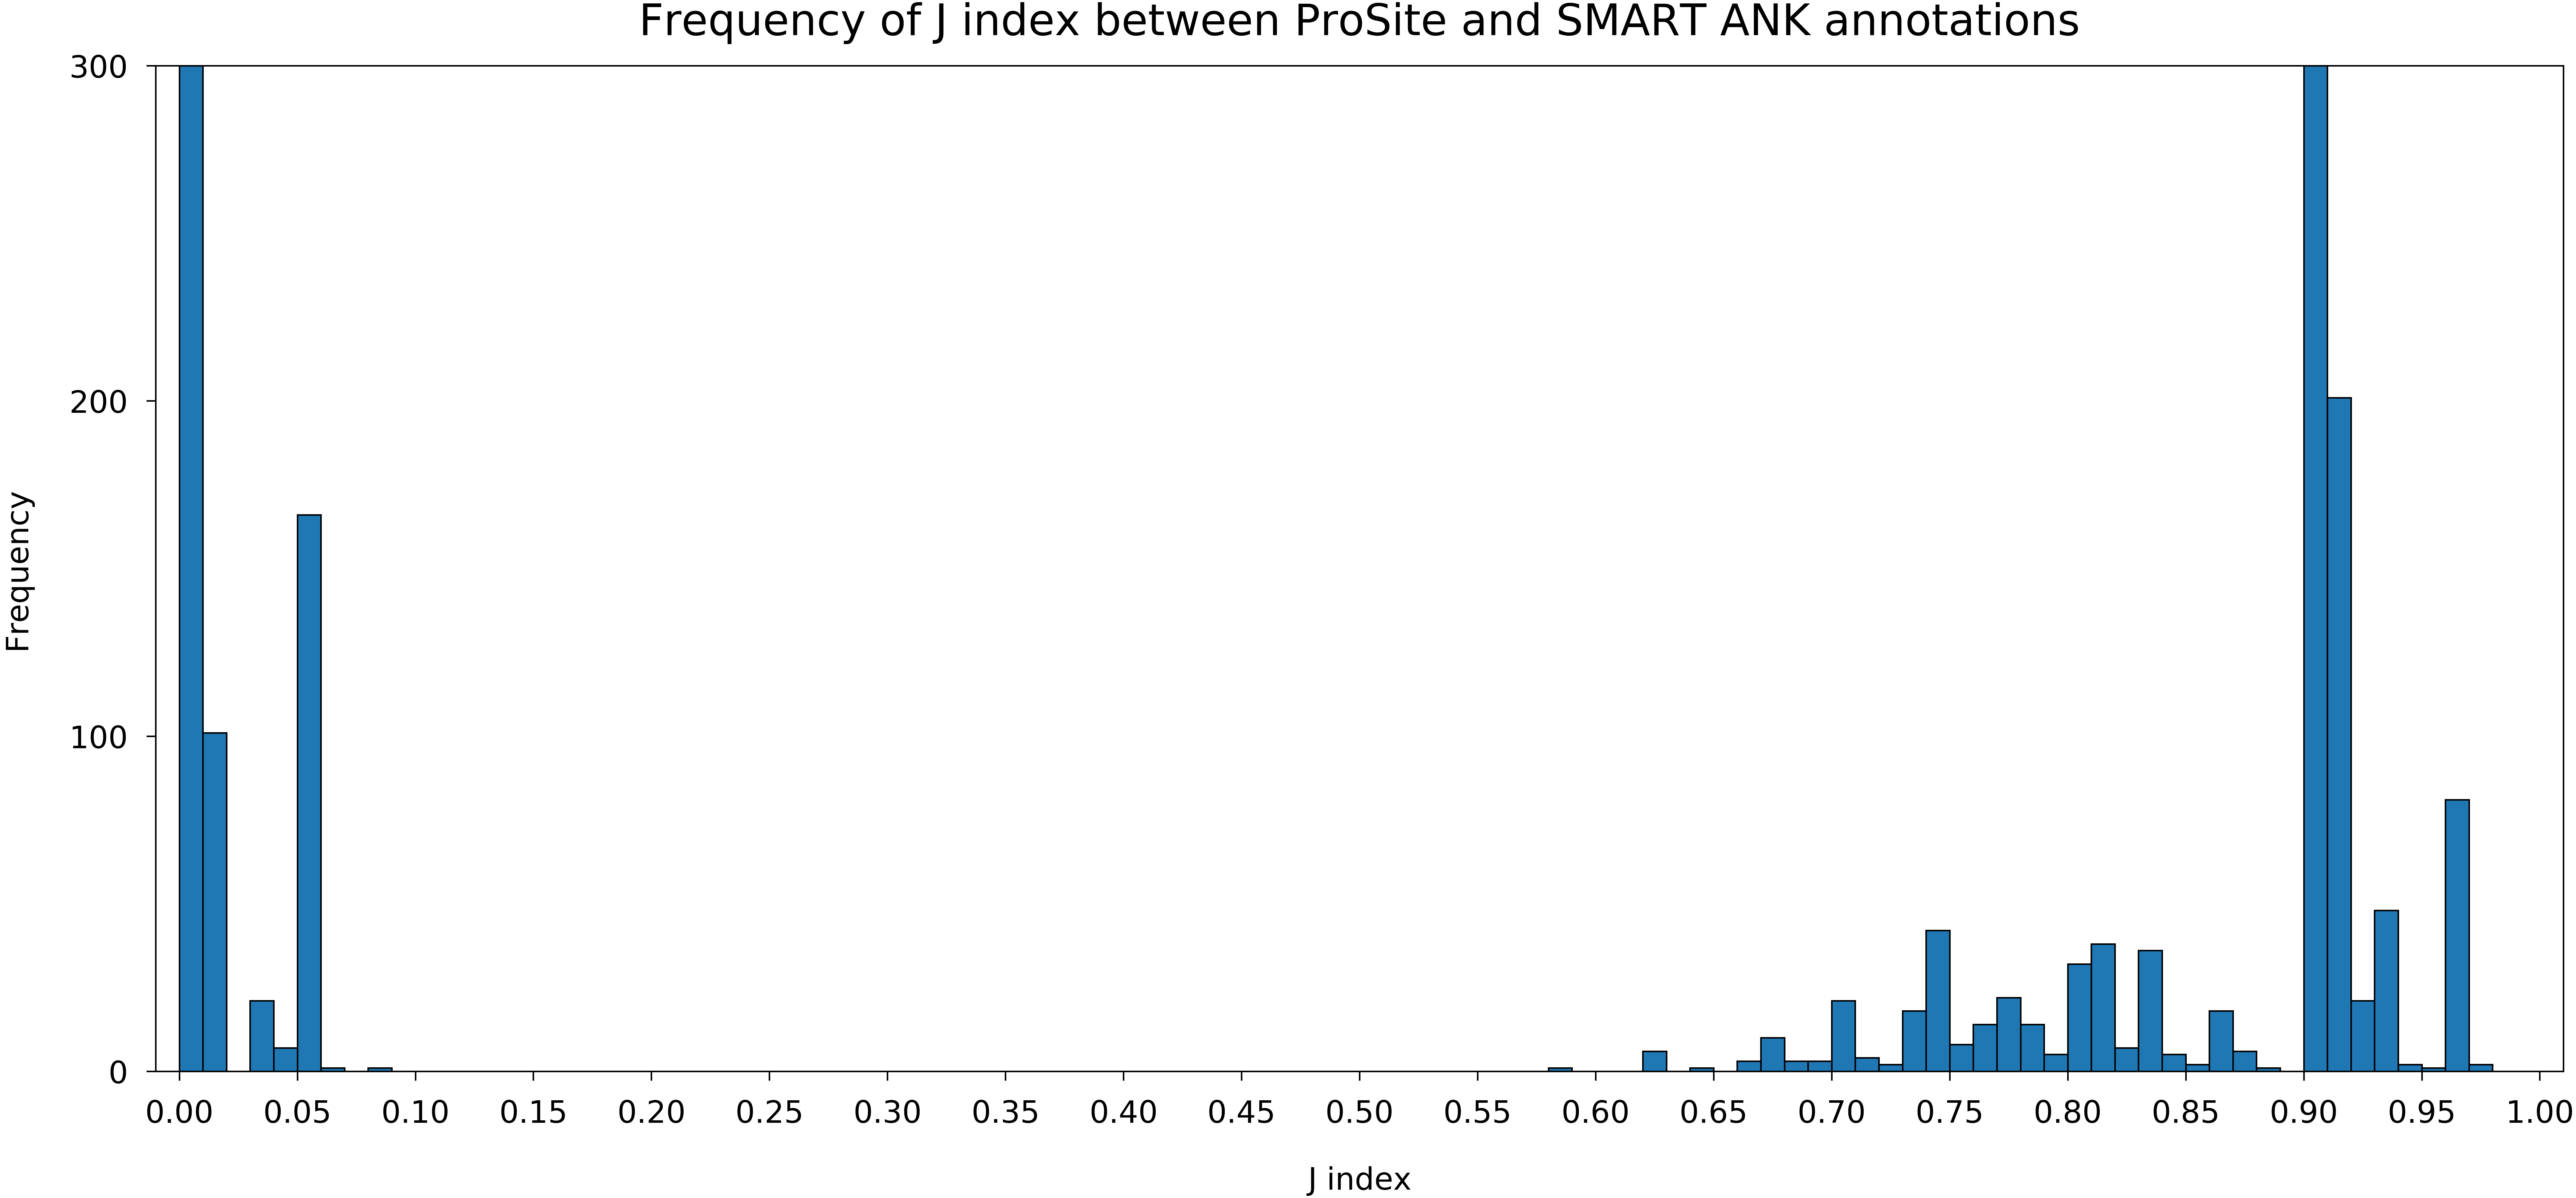

In [207]:
ovs_ps_sm, ovs_dict_ps_sm = retrieve_data_allsp.j_overlap(ps, sm, 'ProSite','SMART', key = "ANK", maxy = 300)

In [211]:
ovs_dict_ps_sm_clean = {}
for k, v in ovs_dict_ps_sm.items():
    if v > 0.1 and v < 0.65:
        ovs_dict_ps_sm_clean[k] = v
ovs_dict_ps_sm_clean

{('CHLAE_PS50088_Q2IBA2/842-863',
  'CHLAE_SM00248_Q2IBA2/842-876'): 0.6285714285714286,
 ('COLGU_PS50088_Q07DY4/842-863',
  'COLGU_SM00248_Q07DY4/842-876'): 0.6285714285714286,
 ('GORGO_PS50088_Q2IBF7/842-863',
  'GORGO_SM00248_Q2IBF7/842-876'): 0.6285714285714286,
 ('HUMAN_PS50088_Q8WZ74/842-863',
  'HUMAN_SM00248_Q8WZ74/842-876'): 0.6285714285714286,
 ('MOUSE_PS50088_Q9WTK5/487-507',
  'MOUSE_SM00248_Q9WTK5/487-522'): 0.5833333333333334,
 ('MOUSE_PS50088_Q9Z2F6/129-150',
  'MOUSE_SM00248_Q9Z2F6/129-162'): 0.6470588235294118,
 ('PAPAN_PS50088_A0M8S4/842-863',
  'PAPAN_SM00248_A0M8S4/842-876'): 0.6285714285714286,
 ('PONAB_PS50088_Q2IBE6/842-863',
  'PONAB_SM00248_Q2IBE6/842-876'): 0.6285714285714286}

In [208]:
ps_dict = retrieve_data_allsp.df_to_dict(ps)
sm_dict = retrieve_data_allsp.df_to_dict(sm)
ps_sm_dict, sm_ps_accs = retrieve_data_allsp.merge_dfs(ps_dict, sm_dict, "PS50088", "SM00248", 0.6)
ps_sm_df = retrieve_data_allsp.get_df_from_dict(ps_sm_dict)
ps_sm_df = ps_sm_df.sort_values(by = ["accession", "start", "end"])
ps_sm_dict = retrieve_data_allsp.df_to_dict2(ps_sm_df)

Total number of annotations: 6444
Repeats in new protein: 225
Better annotated repeats in sample: 0
Absent repeats: 2100
Better annotated repeats in reference: 4119
The addition is: 6444


In [209]:
ps_sm_df.loc[:, "origin"] = ps_sm_df["source"]
ps_sm_df.loc[:, "source"] = "PS_SM"

## MERGING UNIPROT TO REFERENCE (PROSITE + SMART)

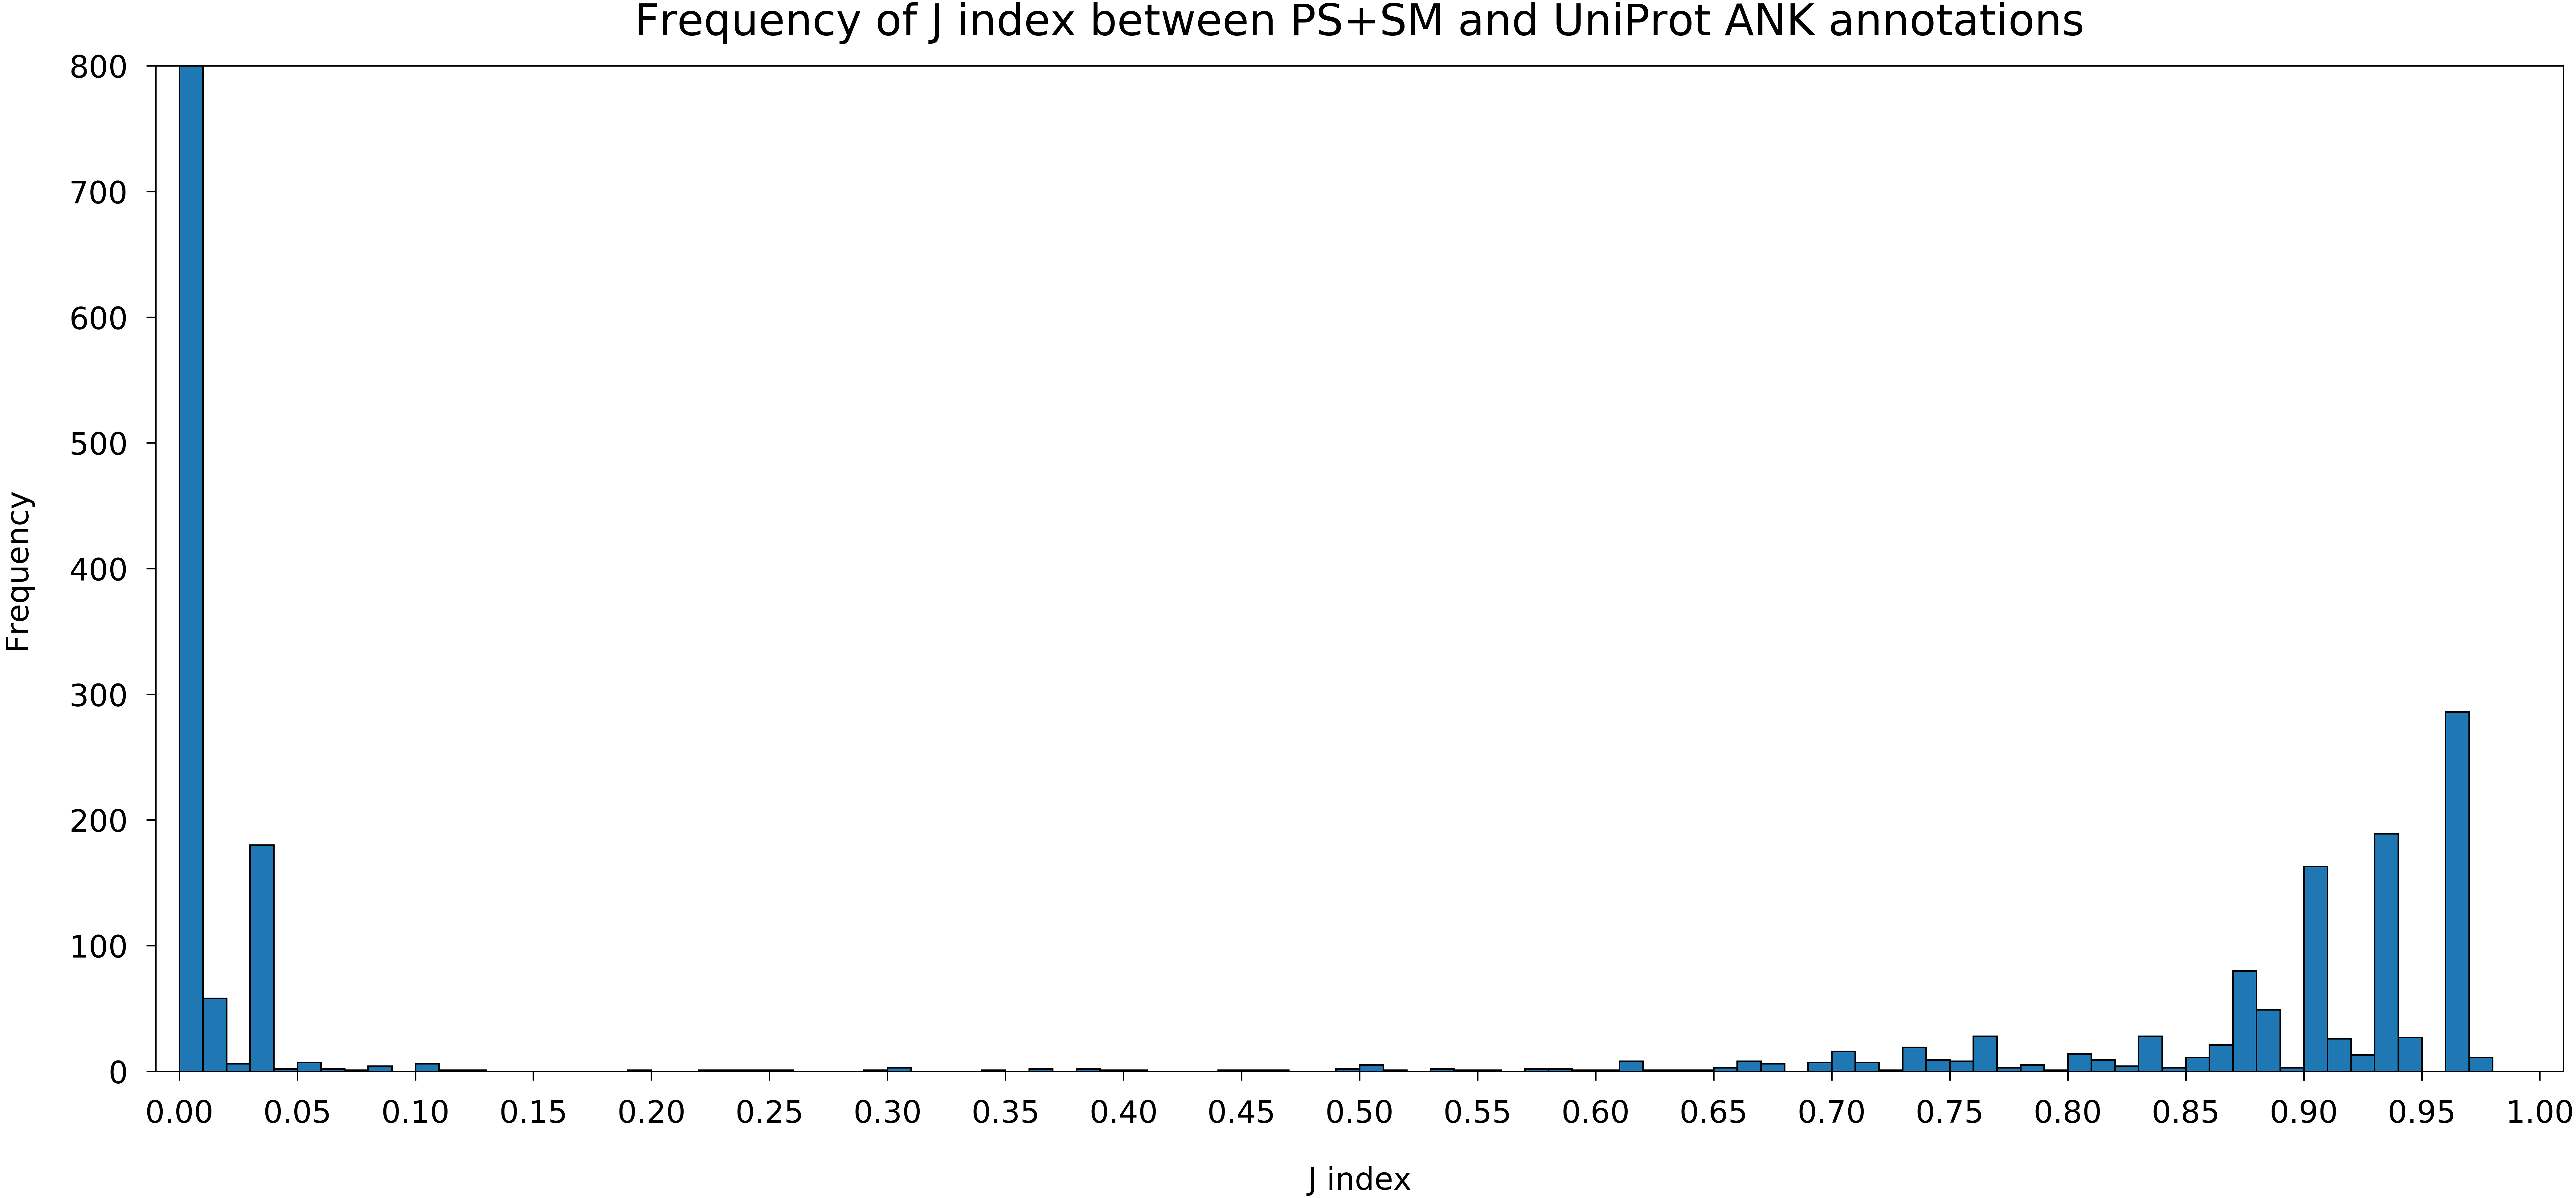

In [210]:
up.loc[:, "origin"] = up["source"]
ov_ps_sm_up, ovs_dict_ps_sm_up = retrieve_data_allsp.j_overlap(ps_sm_df, up, "PS+SM", "UniProt")

In [212]:
ovs_dict_ps_sm_up_clean = {}
for k, v in ovs_dict_ps_sm_up.items():
    if v > 0.1 and v < 0.55:
        ovs_dict_ps_sm_up_clean[k] = v
ovs_dict_ps_sm_up_clean

{('CHICK_PS_SM_Q5F478/470-527',
  'CHICK_Uniprot_Q5F478/470-499'): 0.5172413793103449,
 ('CHICK_PS_SM_Q5ZIJ9/698-762',
  'CHICK_Uniprot_Q5ZIJ9/698-726'): 0.4461538461538462,
 ('DROME_PS_SM_Q9VUX2/802-860',
  'DROME_Uniprot_Q9VUX2/802-833'): 0.5423728813559322,
 ('HUMAN_PS_SM_A6NJG2/147-176',
  'HUMAN_Uniprot_A6NJG2/147-162'): 0.5333333333333333,
 ('HUMAN_PS_SM_Q5VYY1/72-130',
  'HUMAN_Uniprot_Q5VYY1/72-100'): 0.4915254237288136,
 ('HUMAN_PS_SM_Q5VYY1/72-130',
  'HUMAN_Uniprot_Q5VYY1/101-130'): 0.5084745762711864,
 ('HUMAN_PS_SM_Q8N8A2/470-527', 'HUMAN_Uniprot_Q8N8A2/470-498'): 0.5,
 ('MIMIV_PS_SM_Q5UPG6/71-134',
  'MIMIV_Uniprot_Q5UPG6/68-104'): 0.5074626865671642,
 ('MIMIV_PS_SM_Q5UPG6/71-134', 'MIMIV_Uniprot_Q5UPG6/105-134'): 0.46875,
 ('MIMIV_PS_SM_Q5UPH0/117-146',
  'MIMIV_Uniprot_Q5UPH0/133-162'): 0.30434782608695654,
 ('MIMIV_PS_SM_Q5UR93/329-361',
  'MIMIV_Uniprot_Q5UR93/356-385'): 0.10526315789473684,
 ('MOUSE_PS_SM_B2RXR6/470-527', 'MOUSE_Uniprot_B2RXR6/470-498'): 0.5,
 ('MOUS

In [213]:
up_dict = retrieve_data_allsp.df_to_dict(up)
ps_sm_dict = retrieve_data_allsp.df_to_dict(ps_sm_df)
ps_sm_up_dict, ps_sm_up_accs = retrieve_data_allsp.merge_dfs(ps_sm_dict, up_dict, "PS_SM", "Uniprot", 0.55)
ps_sm_up_df = retrieve_data_allsp.get_df_from_dict(ps_sm_up_dict)
ps_sm_up_df = ps_sm_up_df.sort_values(by = ["accession", "start"])
ps_sm_up_df.index = range(0, len(ps_sm_up_df))
ps_sm_up_dict = retrieve_data_allsp.df_to_dict2(ps_sm_up_df)

Total number of annotations: 7418
Repeats in new protein: 305
Better annotated repeats in sample: 0
Absent repeats: 669
Better annotated repeats in reference: 6444
The addition is: 7418


In [214]:
ps_sm_up_df.loc[:, "source"] = "PS_SM_UP"

## MERGING PRINTS TO REFERENCE (PROSITE + SMART + UNIPROT)

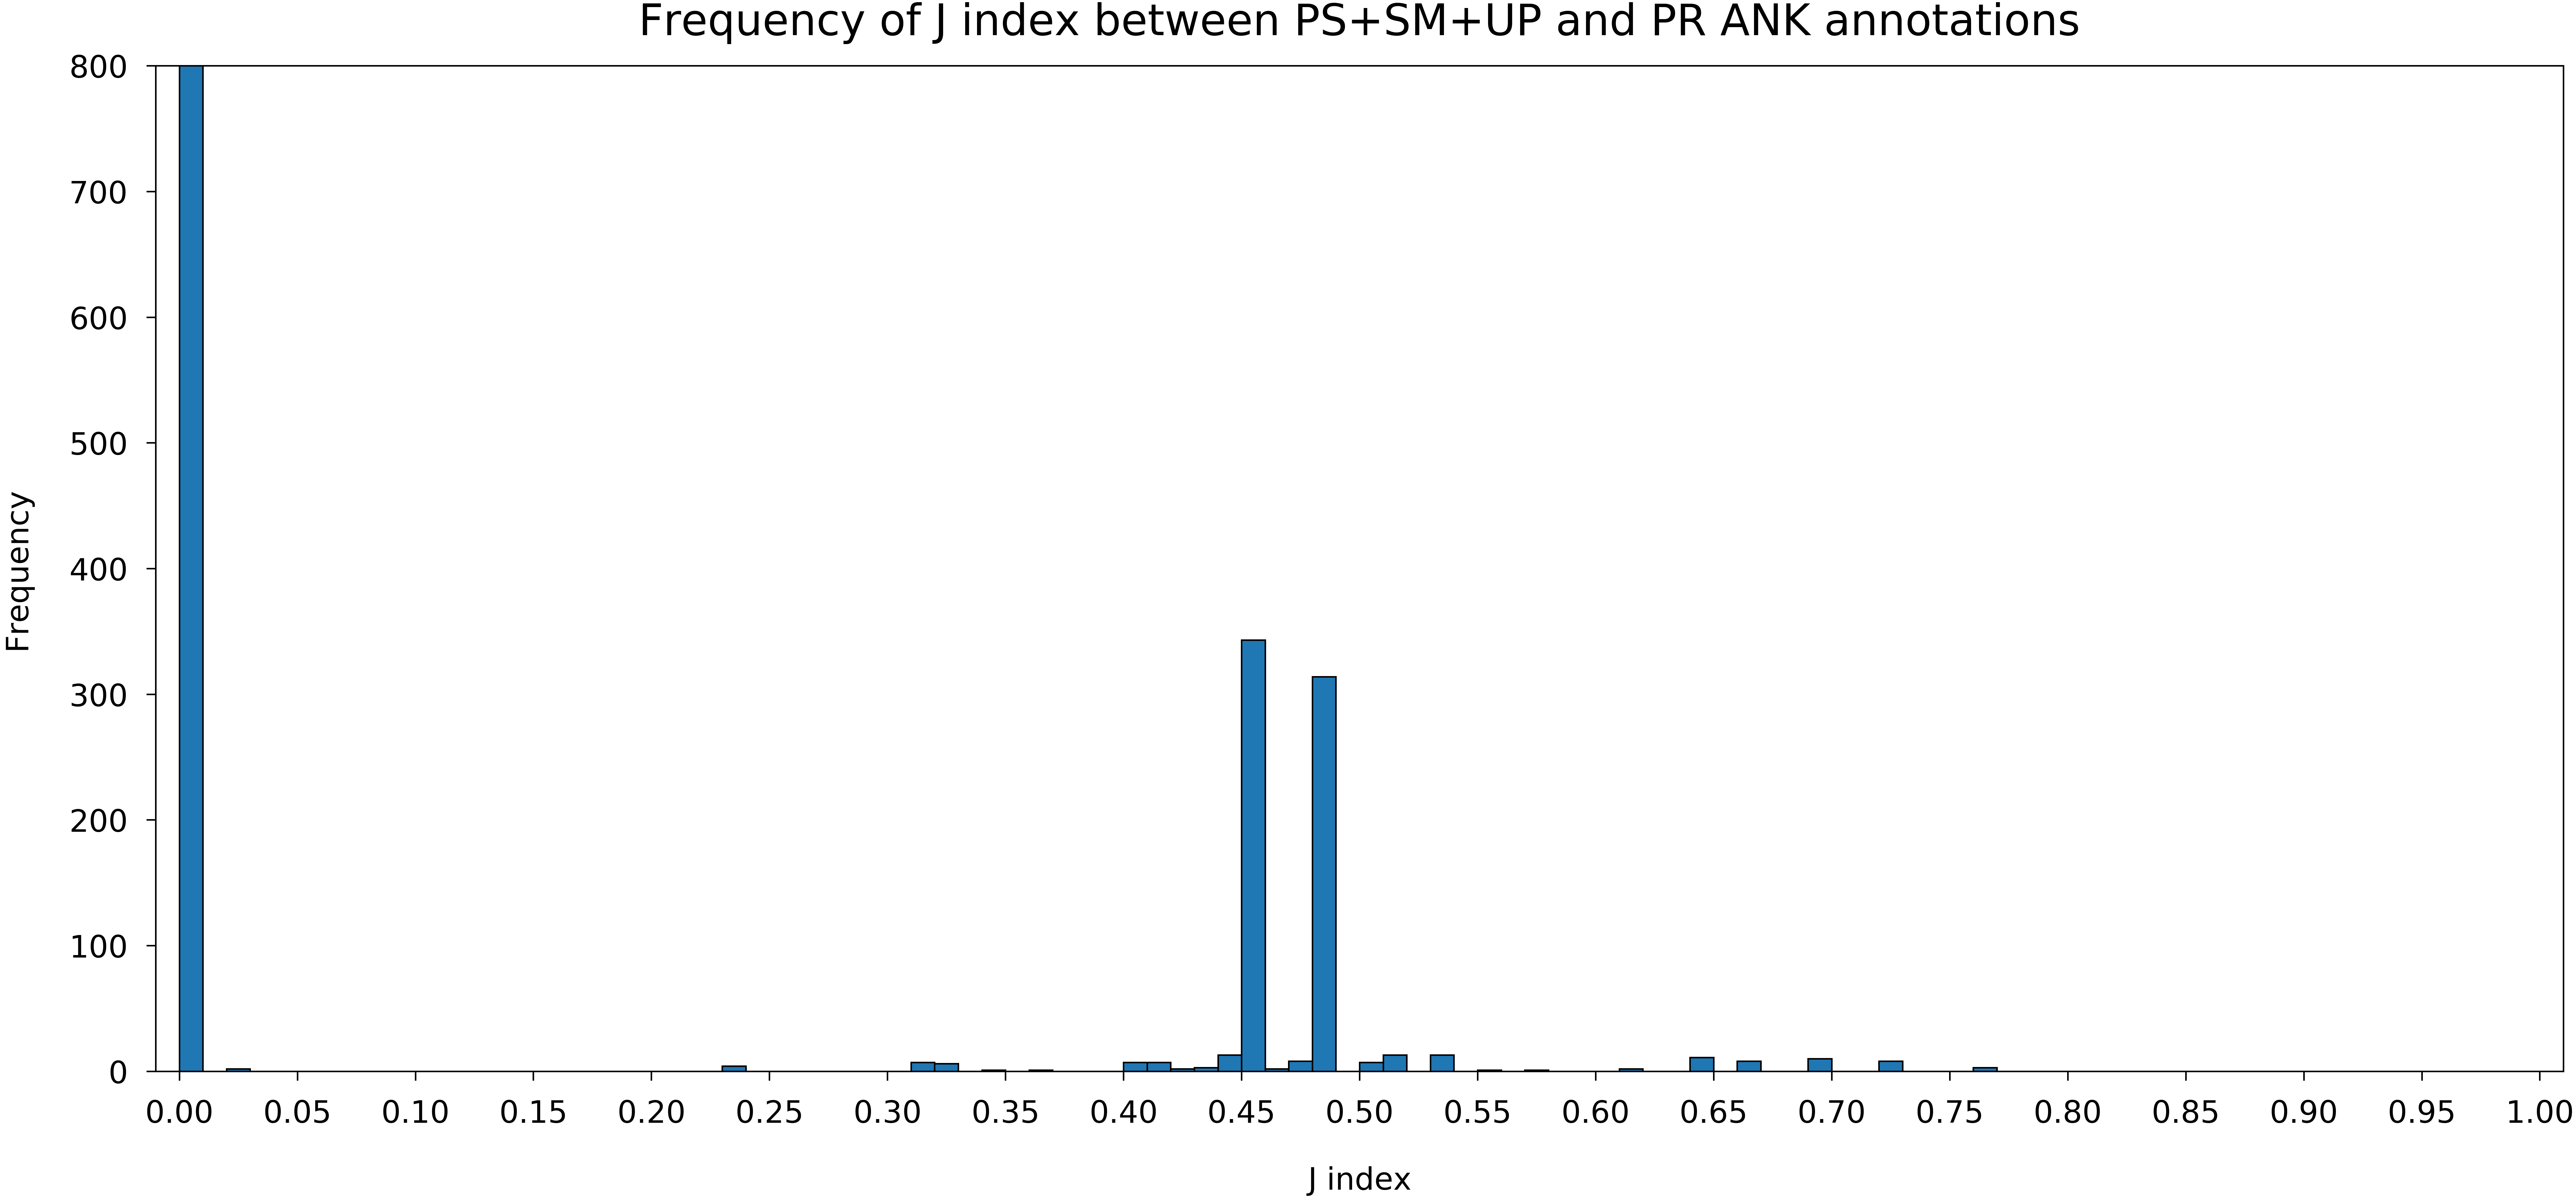

In [215]:
pr.loc[:, "origin"] = pr["source"]
ovs_ps_sm_up_pR, ovs_dict_ps_sm_up_pr = retrieve_data_allsp.j_overlap(ps_sm_up_df, pr, "PS+SM+UP", "PR")

In [216]:
ovs_dict_ps_sm_up_pr_clean = {}
for k, v in ovs_dict_ps_sm_up_pr.items():
    if v > 0.05 and v < 0.3:
        ovs_dict_ps_sm_up_pr_clean[k] = v

In [217]:
ovs_dict_ps_sm_up_pr_clean

{('HUMAN_PR01415_Q5VYY1/117-131',
  'HUMAN_PS_SM_UP_Q5VYY1/72-130'): 0.23333333333333334,
 ('HUMAN_PR01415_Q8NB46/532-546',
  'HUMAN_PS_SM_UP_Q8NB46/488-545'): 0.23728813559322035,
 ('MOUSE_PR01415_Q8BTI7/532-546',
  'MOUSE_PS_SM_UP_Q8BTI7/488-545'): 0.23728813559322035,
 ('MOUSE_PR01415_Q9D3J5/117-131',
  'MOUSE_PS_SM_UP_Q9D3J5/72-130'): 0.23333333333333334}

In [218]:
pr_dict = retrieve_data_allsp.df_to_dict(pr)
ps_sm_up_dict = retrieve_data_allsp.df_to_dict(ps_sm_up_df)
ps_sm_up_pr_dict, ps_sm_up_pr_accs = retrieve_data_allsp.merge_dfs(ps_sm_up_dict, pr_dict, "PS_SM_UP", "PR01415", 0.2)
ps_sm_up_pr_df = retrieve_data_allsp.get_df_from_dict(ps_sm_up_pr_dict)

Total number of annotations: 7421
Repeats in new protein: 0
Better annotated repeats in sample: 0
Absent repeats: 3
Better annotated repeats in reference: 7418
The addition is: 7421


In [219]:
ps_sm_up_pr_df.loc[:, "source"] = "PS_SM_UP_PR"

## MERGING PF00023 TO REFERENCE (PROSITE + SMART + UNIPROT + PRINTS)

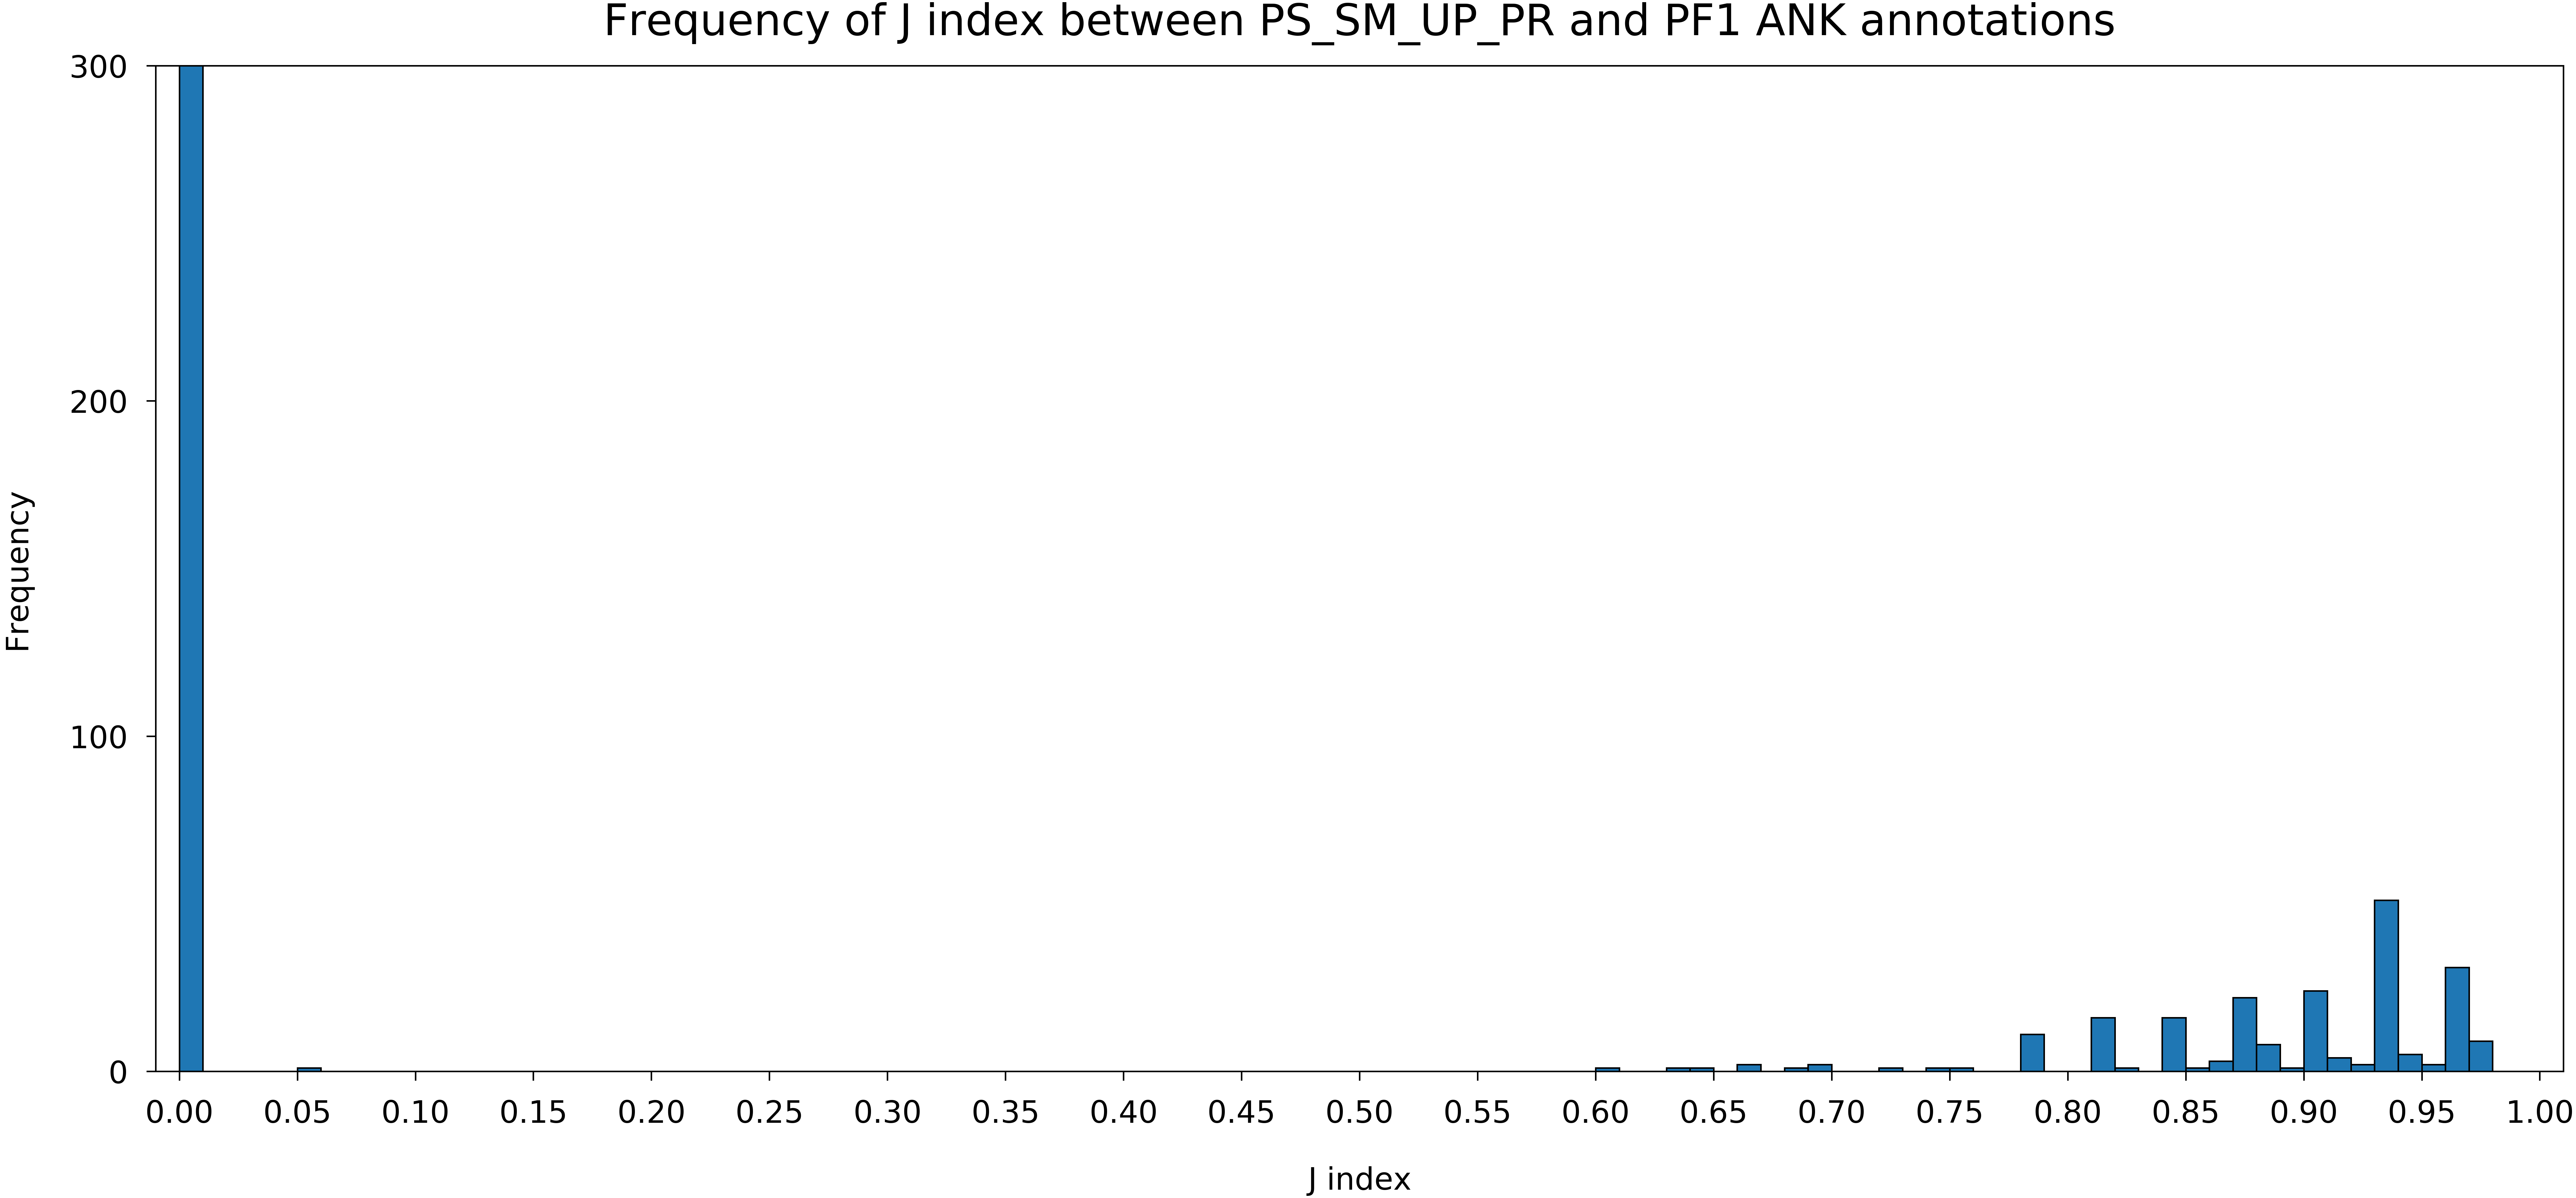

In [220]:
pf1.loc[:, "origin"] = pf1.loc[:, "source"]
ovs_ps_sm_up_pr_pf1, ovs_dict_ps_sm_up_pr_pf1 = retrieve_data_allsp.j_overlap(ps_sm_up_pr_df, pf1, "PS_SM_UP_PR", "PF1", maxy = 300)

In [221]:
ovs_dict_ps_sm_up_pr_pf1_clean = {}
for k, v in ovs_dict_ps_sm_up_pr_pf1.items():
    if v > 0.05 and v < 0.6:
        ovs_dict_ps_sm_up_pr_pf1_clean[k] = v

In [222]:
ovs_dict_ps_sm_up_pr_pf1_clean

{('MIMIV_PF00023_Q5UQY9/166-191',
  'MIMIV_PS_SM_UP_PR_Q5UQY9/189-221'): 0.05357142857142857}

In [223]:
pf1_dict = retrieve_data_allsp.df_to_dict(pf1)
ps_sm_up_pr_dict = retrieve_data_allsp.df_to_dict(ps_sm_up_pr_df)
ps_sm_up_pr_pf1_dict, ps_sm_up_pr_pf1_accs = retrieve_data_allsp.merge_dfs(ps_sm_up_pr_dict, pf1_dict, "PS_SM_UP_PR", "PF00023", 0.75)
ps_sm_up_pr_pf1_df = retrieve_data_allsp.get_df_from_dict(ps_sm_up_pr_pf1_dict)

Total number of annotations: 7431
Repeats in new protein: 0
Better annotated repeats in sample: 0
Absent repeats: 10
Better annotated repeats in reference: 7421
The addition is: 7431


In [224]:
ps_sm_up_pr_pf1_df.loc[:, "source"] = "PS_SM_UP_PR_PF1"

## MERGING PF13606 TO REFERENCE (PROSITE + SMART + UNIPROT + PRINTS + PF00023)

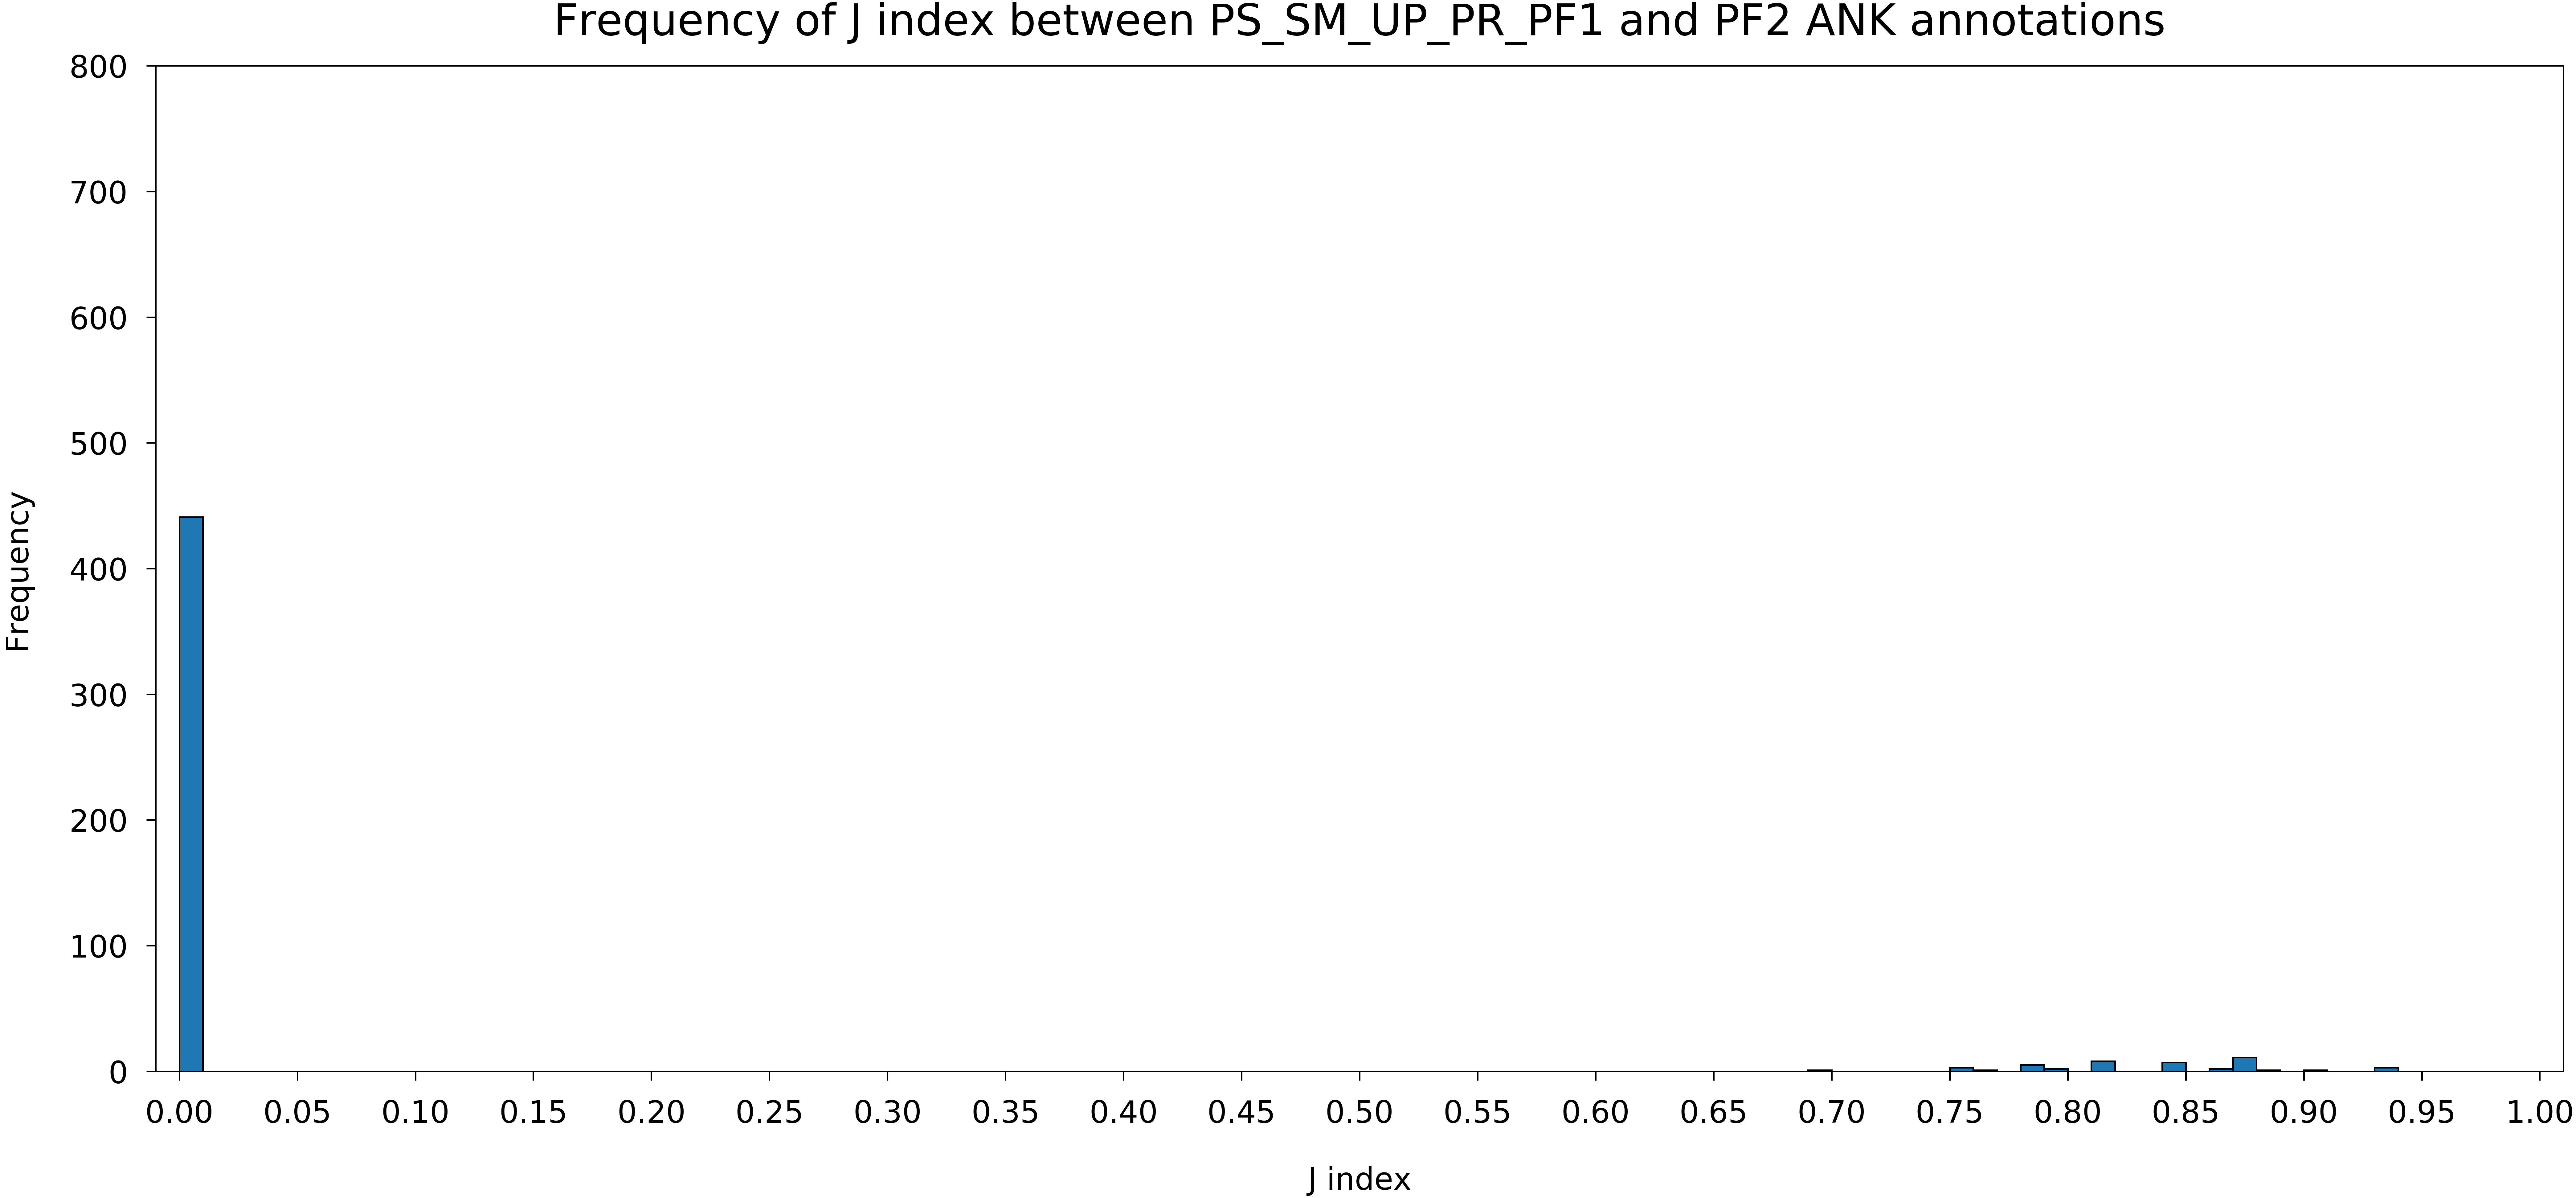

In [225]:
pf2.loc[:, "origin"] = pf2["source"]
ovs_ps_sm_up_pr_pf1_pf2, ovs_dict_ps_sm_up_pr_pf1_pf2 = retrieve_data_allsp.j_overlap(ps_sm_up_pr_pf1_df, pf2, "PS_SM_UP_PR_PF1", "PF2")

In [226]:
ovs_dict_ps_sm_up_pr_pf1_pf2_clean = {}
for k, v in ovs_dict_ps_sm_up_pr_pf1_pf2.items():
    if v > 0.05 and v < 0.8:
        ovs_dict_ps_sm_up_pr_pf1_pf2_clean[k] = v

In [227]:
ovs_dict_ps_sm_up_pr_pf1_pf2_clean

{('ARATH_PF13606_Q94B55/195-220',
  'ARATH_PS_SM_UP_PR_PF1_Q94B55/194-226'): 0.7878787878787878,
 ('CAEBR_PF13606_Q60J38/634-659',
  'CAEBR_PS_SM_UP_PR_PF1_Q60J38/632-664'): 0.7878787878787878,
 ('DANRE_PF13606_Q6P9Z4/41-68',
  'DANRE_PS_SM_UP_PR_PF1_Q6P9Z4/40-63'): 0.7931034482758621,
 ('DICDI_PF13606_Q54XY6/395-417',
  'DICDI_PS_SM_UP_PR_PF1_Q54XY6/395-427'): 0.696969696969697,
 ('DROME_PF13606_P48994/155-179',
  'DROME_PS_SM_UP_PR_PF1_P48994/152-184'): 0.7575757575757576,
 ('DROME_PF13606_Q9VFD5/40-68',
  'DROME_PS_SM_UP_PR_PF1_Q9VFD5/40-61'): 0.7586206896551724,
 ('HUMAN_PF13606_Q9Y575/114-139',
  'HUMAN_PS_SM_UP_PR_PF1_Q9Y575/111-143'): 0.7878787878787878,
 ('MOUSE_PF13606_Q8CEF1/40-68',
  'MOUSE_PS_SM_UP_PR_PF1_Q8CEF1/40-62'): 0.7931034482758621,
 ('MOUSE_PF13606_Q9WV72/114-139',
  'MOUSE_PS_SM_UP_PR_PF1_Q9WV72/111-143'): 0.7878787878787878,
 ('ORYSJ_PF13606_Q65XV2/196-221',
  'ORYSJ_PS_SM_UP_PR_PF1_Q65XV2/195-227'): 0.7878787878787878,
 ('RAT_PF13606_Q4V890/41-69',
  'RAT_PS_SM_

In [228]:
pf2_dict = retrieve_data_allsp.df_to_dict(pf2)
ps_sm_up_pr_pf1_dict = retrieve_data_allsp.df_to_dict(ps_sm_up_pr_pf1_df)
ps_sm_up_pr_pf1_pf2_dict, ps_sm_up_pr_pf1_pf2_accs = retrieve_data_allsp.merge_dfs(ps_sm_up_pr_pf1_dict, pf2_dict, "PS_SM_UP_PR_PF1", "PF13606", 0.6)
ps_sm_up_pr_pf1_pf2_df = retrieve_data_allsp.get_df_from_dict(ps_sm_up_pr_pf1_pf2_dict)

Total number of annotations: 7431
Repeats in new protein: 0
Better annotated repeats in sample: 0
Absent repeats: 0
Better annotated repeats in reference: 7431
The addition is: 7431


In [229]:
ps_sm_up_pr_pf1_pf2_df = ps_sm_up_pr_pf1_pf2_df.sort_values(by = ["accession", "start", "end"])
ps_sm_up_pr_pf1_pf2_df.index = range(0, len(ps_sm_up_pr_pf1_pf2_df))
anks = ps_sm_up_pr_pf1_pf2_df
anks.loc[:, "source"] = "ALL_DBS"

In [230]:
anks.origin.value_counts()

PS50088    4119
SM00248    2325
Uniprot     974
PF00023      10
PR01415       3
Name: origin, dtype: int64

In [231]:
anks[anks.species == "HUMAN"].origin.value_counts()

PS50088    1016
SM00248     401
Uniprot     153
PF00023       5
Name: origin, dtype: int64

In [232]:
retrieve_data_allsp.get_overlapping_p(ps_sm_up_pr_pf1_pf2_dict) # 828 OVERLAPPING ANNOTATIONS

(828, 0.11142511102139685)

In [233]:
ank_ov_prots = retrieve_data_allsp.get_overlapping_proteins(anks)

In [234]:
ank_ov_prots_clean = {}
for k, v in ank_ov_prots.items():
    if v[0] != 0:
        ank_ov_prots_clean[k] = v
ank_ov_prots_clean

{'A0A072VIM5': (1, 0.3333333333333333),
 'A0M8T3': (1, 0.16666666666666666),
 'A1X154': (1, 0.16666666666666666),
 'A1ZBY1': (1, 0.125),
 'A4D7T3': (1, 0.16666666666666666),
 'A5PMU4': (1, 0.14285714285714285),
 'A6NJG2': (1, 0.25),
 'A7MB89': (1, 0.1111111111111111),
 'B2RXR6': (1, 0.034482758620689655),
 'F1N6G5': (1, 0.16666666666666666),
 'G0LXV8': (1, 0.045454545454545456),
 'G8GTN7': (1, 0.3333333333333333),
 'O18784': (1, 0.25),
 'O35119': (1, 0.25),
 'O55222': (1, 0.2),
 'O60733': (1, 0.14285714285714285),
 'O62852': (1, 0.25),
 'O75762': (1, 0.0625),
 'O75832': (1, 0.14285714285714285),
 'O95271': (1, 0.047619047619047616),
 'P04297': (1, 0.16666666666666666),
 'P09959': (3, 0.6),
 'P0C550': (1, 0.16666666666666666),
 'P0C6P7': (1, 0.125),
 'P0C6S7': (1, 0.14285714285714285),
 'P0DJE3': (1, 0.045454545454545456),
 'P0DSS9': (1, 0.125),
 'P0DST0': (1, 0.125),
 'P16157': (1, 0.04),
 'P20632': (1, 0.16666666666666666),
 'P20749': (1, 0.14285714285714285),
 'P23631': (1, 0.0454545

In [235]:
anks_dict = retrieve_data_allsp.df_to_dict2(anks)

In [242]:
anks

,accession,end,length,repeat_id,source,start,repeat_length,taxonomy_id,species,conf_index,origin
0,A0A072VIM5,277,492,A0A072VIM5/248-277,ALL_DBS,248,30,3880,MEDTR,2,Uniprot
1,A0A072VIM5,307,492,A0A072VIM5/277-307,ALL_DBS,277,31,3880,MEDTR,1,SM00248
2,A0A072VIM5,344,492,A0A072VIM5/312-344,ALL_DBS,312,33,3880,MEDTR,0,PS50088
3,A0A084B9Z8,872,1930,A0A084B9Z8/840-872,ALL_DBS,840,33,1280523,STACB,1,SM00248
4,A0A084B9Z8,909,1930,A0A084B9Z8/878-909,ALL_DBS,878,32,1280523,STACB,1,SM00248
...,...,...,...,...,...,...,...,...,...,...,...
7426,X1WE18,919,1085,X1WE18/895-919,ALL_DBS,895,25,7955,DANRE,0,PS50088
7427,X1WE18,962,1085,X1WE18/929-962,ALL_DBS,929,34,7955,DANRE,1,SM00248
7428,X1WE18,999,1085,X1WE18/967-999,ALL_DBS,967,33,7955,DANRE,0,PS50088
7429,X1WE18,1033,1085,X1WE18/1000-1033,ALL_DBS,1000,34,7955,DANRE,0,PS50088


In [237]:
anks_fixed_dict = retrieve_data_allsp.fix_overlaps(anks_dict)

Q8GYH5/183-205 within Q8GYH5/182-212
10 Q8GYH5/183-205 2 Q8GYH5/182-212
keeping Q8GYH5/182-212
Q6JAN1/489-510 within Q6JAN1/488-520
11 Q6JAN1/489-510 0 Q6JAN1/488-520
keeping Q6JAN1/488-520
Q5F478/470-499 within Q5F478/470-527
25 Q5F478/470-527 3 Q5F478/470-499
keeping Q5F478/470-499
Q5ZIJ9/698-726 within Q5ZIJ9/698-762
32 Q5ZIJ9/698-762 4 Q5ZIJ9/698-726
keeping Q5ZIJ9/698-726
Q86AT8/168-182 within Q86AT8/150-184
18 Q86AT8/168-182 2 Q86AT8/150-184
keeping Q86AT8/150-184
Q9VJJ7/134-156 within Q9VJJ7/131-163
10 Q9VJJ7/134-156 0 Q9VJJ7/131-163
keeping Q9VJJ7/131-163
Q9VUX2/802-833 within Q9VUX2/802-860
26 Q9VUX2/802-860 1 Q9VUX2/802-833
keeping Q9VUX2/802-833
Q9J5H8/286-300 within Q9J5H8/269-302
18 Q9J5H8/286-300 1 Q9J5H8/269-302
keeping Q9J5H8/269-302
A6NJG2/147-162 within A6NJG2/147-176
3 A6NJG2/147-176 17 A6NJG2/147-162
keeping A6NJG2/147-176
P16157/503-525 within P16157/502-534
10 P16157/503-525 0 P16157/502-534
keeping P16157/502-534
Q5VYY1/72-100 within Q5VYY1/72-130
26 Q5VYY1/72-13

In [238]:
retrieve_data_allsp.get_overlapping_p(anks_fixed_dict)

(0, 0.0)

In [239]:
anks_fixed_df = retrieve_data_allsp.get_df_from_dict(anks_fixed_dict)

In [241]:
anks_fixed_df

,accession,end,length,repeat_id,source,start,repeat_length,taxonomy_id,species,conf_index,origin
0,Q6FED0,211,418,Q6FED0/178-211,ALL_DBS,178,34,62977,ACIAD,0,PS50088
1,Q06527,60,323,Q06527/31-60,ALL_DBS,31,30,572477,ALLVD,1,SM00248
2,Q06527,96,323,Q06527/64-96,ALL_DBS,64,33,572477,ALLVD,0,PS50088
3,Q06527,129,323,Q06527/97-129,ALL_DBS,97,33,572477,ALLVD,0,PS50088
4,Q06527,162,323,Q06527/130-162,ALL_DBS,130,33,572477,ALLVD,0,PS50088
...,...,...,...,...,...,...,...,...,...,...,...
7402,Q12013,179,749,Q12013/150-179,ALL_DBS,150,30,559292,YEAST,1,SM00248
7403,Q12013,221,749,Q12013/189-221,ALL_DBS,189,33,559292,YEAST,0,PS50088
7404,Q12013,254,749,Q12013/222-254,ALL_DBS,222,33,559292,YEAST,0,PS50088
7405,Q12451,128,1283,Q12451/106-128,ALL_DBS,106,23,559292,YEAST,0,PS50088


In [248]:
anks_fixed_df.to_csv("/cluster/gjb_lab/2394007/def_data_retrieval/all_anks_allsp_merged.csv", index = False)

In [245]:
anks_fixed_df.origin.value_counts()

PS50088    4118
SM00248    2317
Uniprot     971
PF00023       1
Name: origin, dtype: int64

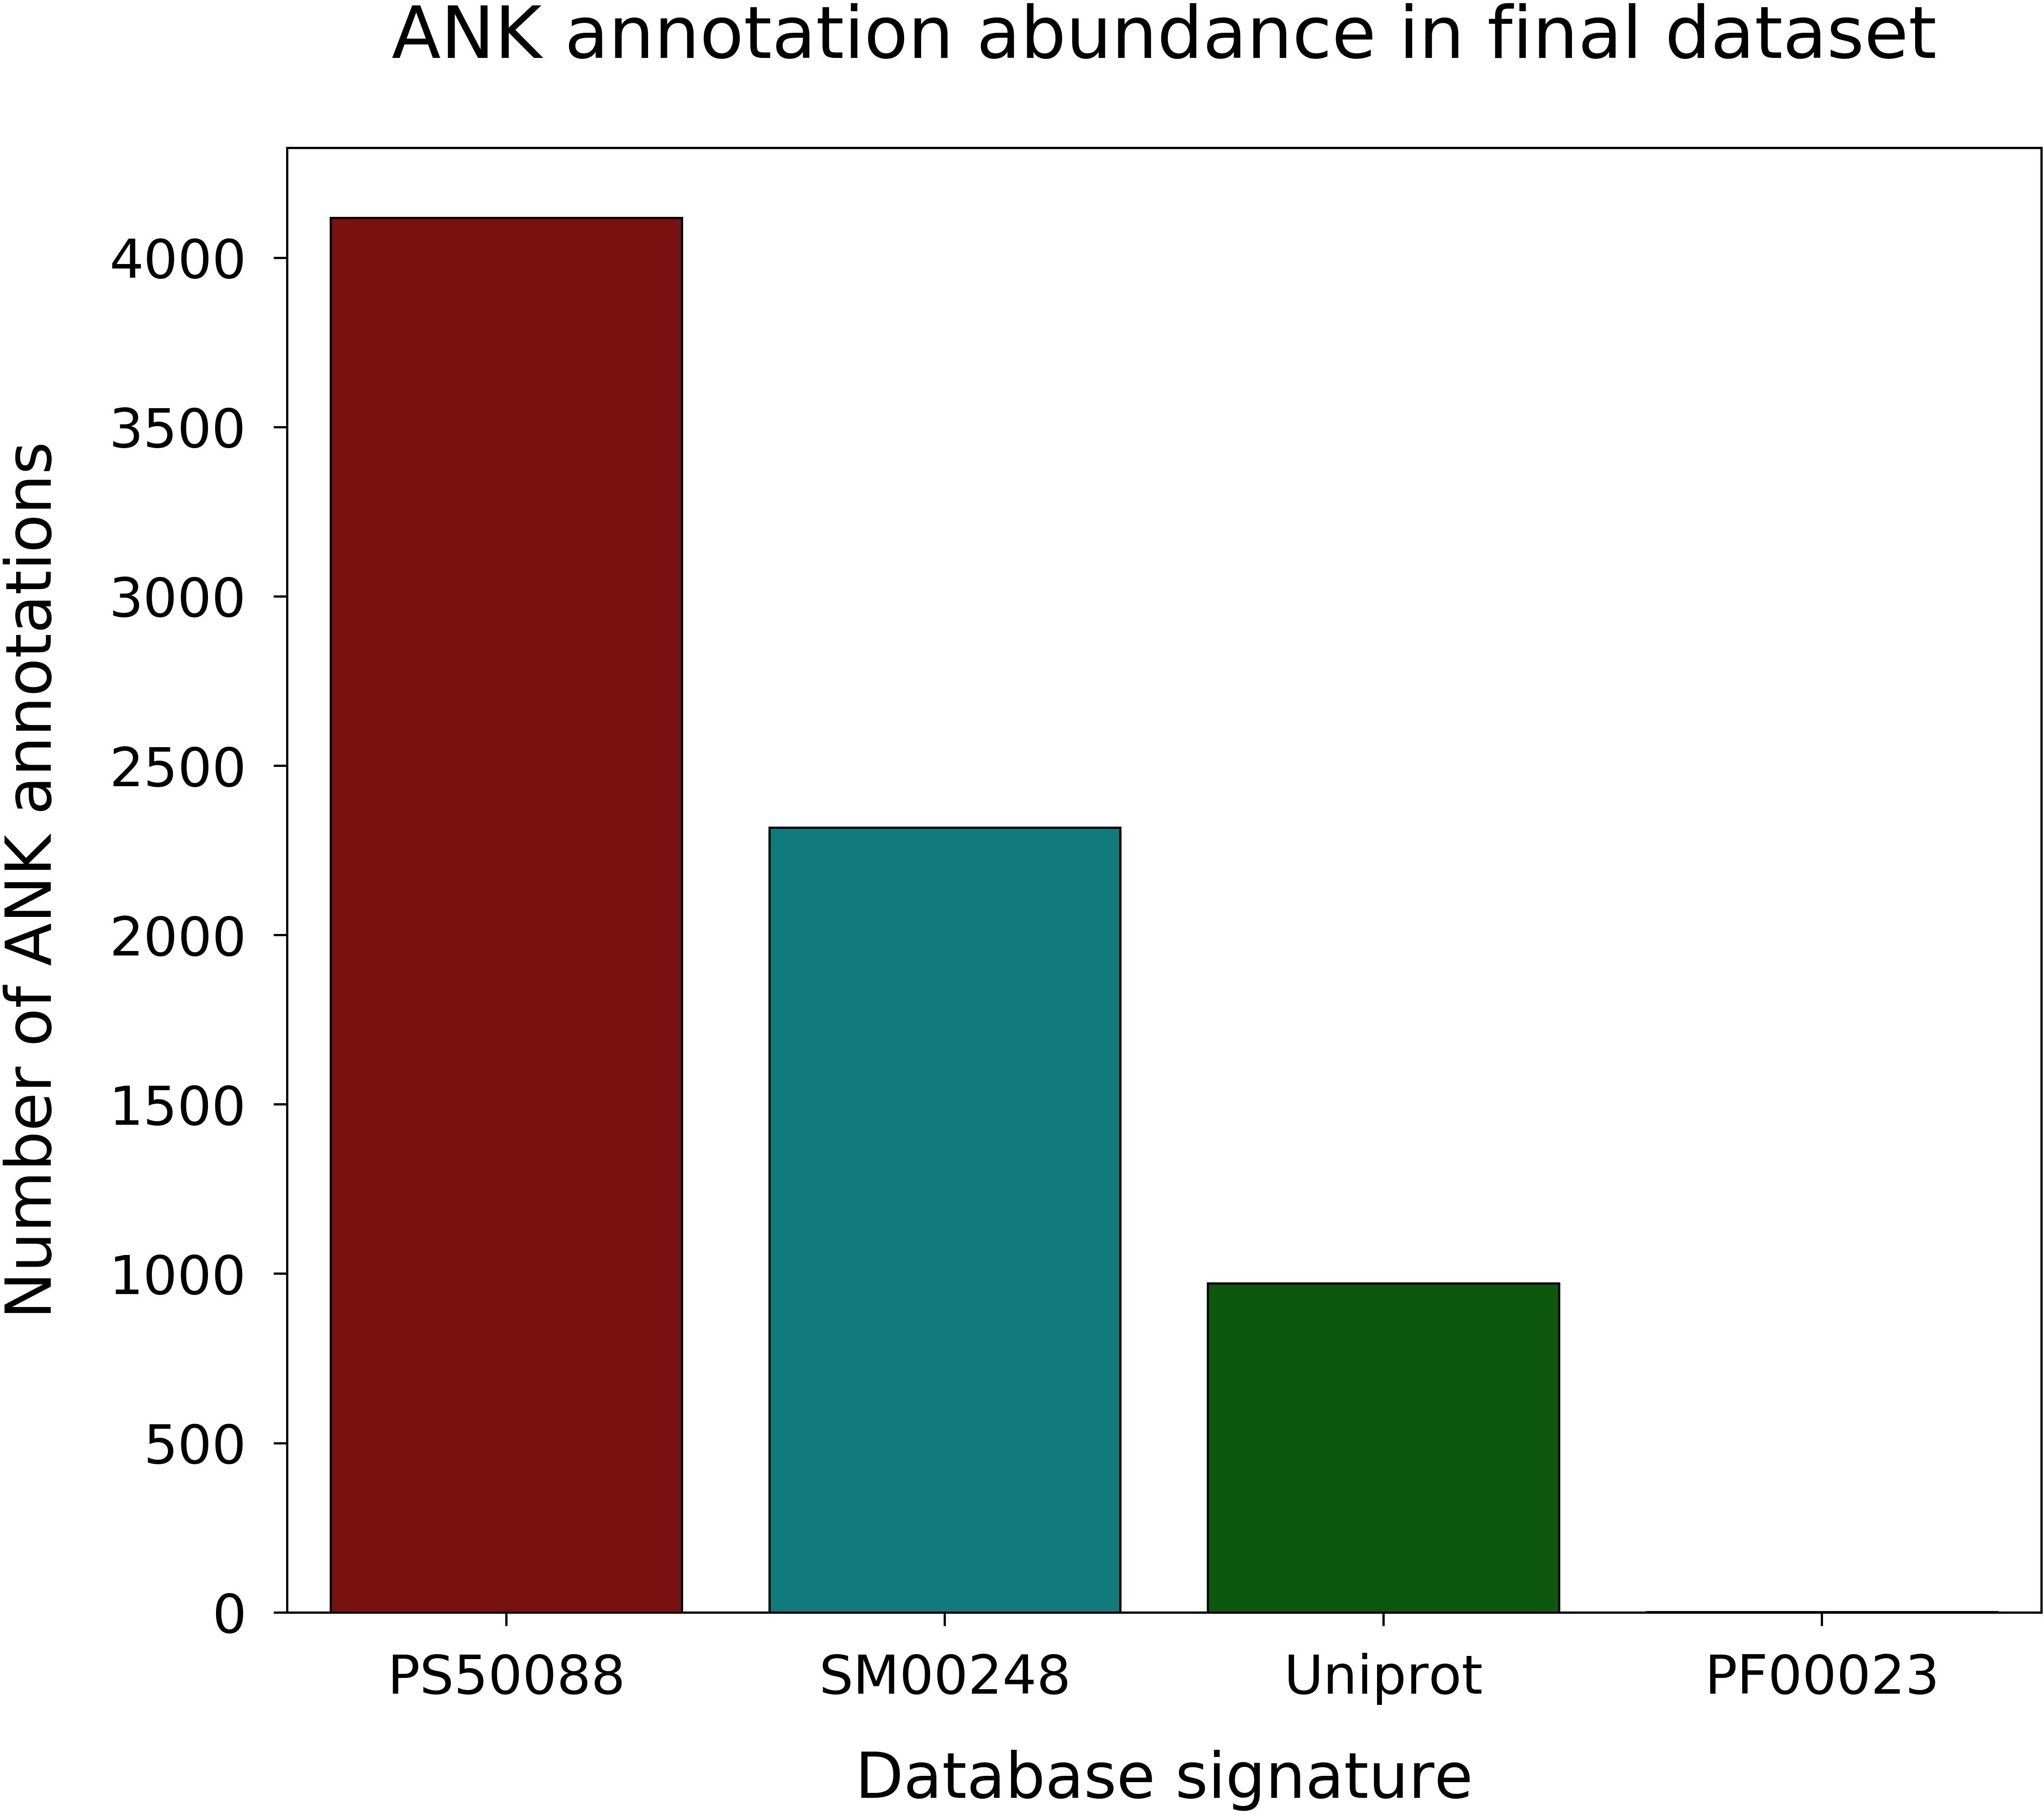

In [253]:
palette = {"SM00248": "darkcyan", "PS50088": "darkred", "Uniprot": "darkgreen", "PF00023": "goldenrod"}
plt.figure(figsize=(70, 60))
ax = sns.countplot(x = "origin", data = anks_fixed_df, edgecolor = "black",linewidth = 5, order = anks_fixed_df["origin"].value_counts().index, palette = palette)
ax.set_title("ANK annotation abundance in final dataset", pad = 200, fontsize = 160)
ax.set_xlabel("Database signature", labelpad = 100, fontsize = 140)
ax.tick_params(axis = "both" , which = "major", pad = 60, width = 5, length = 30, labelsize = 120)
ax.set_ylabel('Number of ANK annotations', labelpad = 100, fontsize = 140)
#plt.savefig('/homes/2394007/figures/def/db_comp_allsp.png')
plt.show()